## AutoEncode 노이즈 제거
- 데이터에 노이즈 제거 활용
- 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [1]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# W,b 고정하도록 seed 설정
set_random_seed(42)

### [1] 데이터 준비 및 로딩

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리

In [4]:
# 스케일링 => 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
x_train=x_train.reshape(-1, 28*28)
x_test=x_test.reshape(-1, 28*28)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [8]:
# 데이터셋에 노이즈 추가
# np.radom.normal(평균loc=0.0, scale=1.0, size=None)
X_train_noised = x_train + np.random.normal(0, 0.5, size=x_train.shape)
X_test_noised = x_test + np.random.normal(0, 0.5, size=x_test.shape)

# 픽셀 범위 0.0~1.0 벗어나는 픽셀값 조정 => np.clip(array, min, max)
X_train_noised = np.clip(X_train_noised, a_min=0, a_max=1)
X_test_noised = np.clip(X_test_noised, a_min=0, a_max=1)

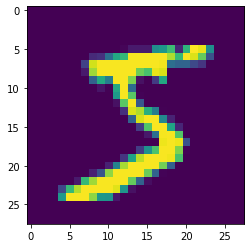

In [10]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

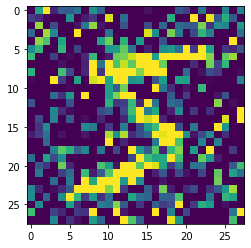

In [12]:
plt.imshow(X_train_noised[0].reshape(28,28))

## [3] 모델 구성

In [13]:
def createModel(n_nords):
    model=Sequential()
    model.add(Dense(units=n_nords, activation='relu', input_shape=(784,)))
    model.add(Dense(784, activation='sigmoid'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
model01=createModel(1)
model02=createModel(2)
model03=createModel(3)
model15=createModel(15)
model100=createModel(100)
model1000=createModel(1000)

In [24]:
model01.fit(X_test_noised, X_test_noised, epochs=1)
model02.fit(X_test_noised, X_test_noised, epochs=1)
model03.fit(X_test_noised, X_test_noised, epochs=1)
model15.fit(X_test_noised, X_test_noised, epochs=1)
model100.fit(X_test_noised, X_test_noised, epochs=1)
model1000.fit(X_test_noised, X_test_noised, epochs=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.0586


In [25]:
print(model01.evaluate(x_train, x_train))
print(model02.evaluate(x_train, x_train))
print(model03.evaluate(x_train, x_train))
print(model15.evaluate(x_train, x_train))
print(model100.evaluate(x_train, x_train))
print(model1000.evaluate(x_train, x_train))

1875/1875 [==============================] - 2s 805us/step - loss: 0.0774
0.07739965617656708
1875/1875 [==============================] - 2s 812us/step - loss: 0.0756
0.07562984526157379
1875/1875 [==============================] - 2s 810us/step - loss: 0.0768
0.07682894915342331
1875/1875 [==============================] - 2s 830us/step - loss: 0.0605
0.0605059489607811
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0348
0.03483137488365173
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0309
0.03093409352004528


In [26]:
pre_out01=model01.predict(x_train[0].reshape(-1,784))
pre_out02=model02.predict(x_train[0].reshape(-1,784))
pre_out03=model03.predict(x_train[0].reshape(-1,784))
pre_out15=model15.predict(x_train[0].reshape(-1,784))
pre_out100=model100.predict(x_train[0].reshape(-1,784))
pre_out1000=model1000.predict(x_train[0].reshape(-1,784))

1/1 [==============================] - 0s 17ms/step


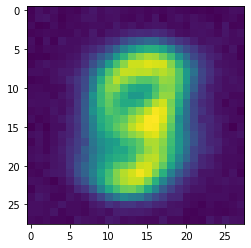

In [27]:
plt.imshow(pre_out01.reshape(28,28))

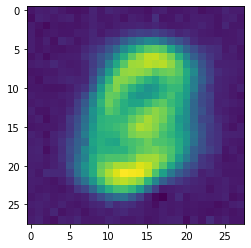

In [28]:
plt.imshow(pre_out02.reshape(28,28))

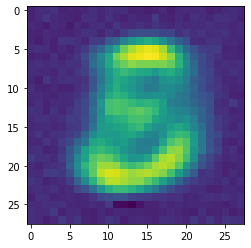

In [29]:
plt.imshow(pre_out03.reshape(28,28))

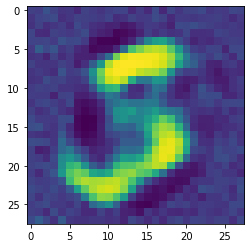

In [32]:
plt.imshow(pre_out15.reshape(28,28))

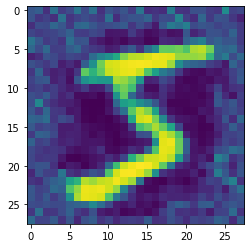

In [33]:
plt.imshow(pre_out100.reshape(28,28))

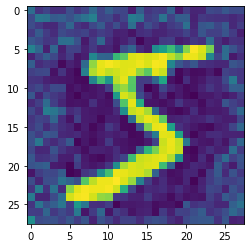

In [34]:
plt.imshow(pre_out1000.reshape(28,28))